In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00


In [ ]:
cd /content/drive/MyDrive/KhoaLuan/DATASET/Train Dataset/siim

/content/drive/MyDrive/KhoaLuan/DATASET/Train Dataset/siim


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow.keras.applications.efficientnet as efn
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

from tensorflow import reduce_sum
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dropout, concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from tensorflow.keras.utils import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.utils.layer_utils import get_source_inputs
from keras.layers import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
#from keras.legacy import interfaces
from tensorflow.keras.utils import get_custom_objects

from tensorflow.keras.layers import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from tensorflow.keras.layers import concatenate,add
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

In [ ]:
cd /content/drive/MyDrive/KhoaLuan/DATASET

/content/drive/MyDrive/KhoaLuan/DATASET


In [ ]:
final_train_df = pd.read_csv('Train Dataset/siim/final_train_data.csv')
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....


In [ ]:
imagePath = '/content/drive/MyDrive/KhoaLuan/DATASET/Train Dataset/siim/train_png_images/'

In [ ]:
final_train_df['Target'] = final_train_df['EncodedPixels'].apply(lambda x : 0 if x == '-1' else 1)

In [ ]:
imagePath = final_train_df['ImagePath_Png']

In [ ]:
labels = final_train_df["Target"]

In [ ]:
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath, labels, test_size = 0.2, random_state = 27, stratify=labels)

In [ ]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  9637
Total Valid Dataset Size :  2410


In [ ]:
import random

In [ ]:
def build_decoder(with_labels=True, target_size=(300, 300)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_png(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img

    def decode_with_labels(path, label):
        return decode(path), label

    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
        return img

    def augment_with_labels(img, label):
        return augment(img), label

    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)

    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)

    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)

    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)

    return dset

In [ ]:
#Building the decoder for building the Train and Valid Dataset:

decoder = build_decoder(with_labels=True, target_size=(256, 256))
print(decoder)

<function build_decoder.<locals>.decode_with_labels at 0x7f73bf048dc0>


In [ ]:
#Creating the Augmented Train and Valid Datasets:

dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16,
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

In [ ]:
print('Train Dataset : ',dtrain)
print('Valid Dataset : ',dvalid)

Train Dataset :  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Valid Dataset :  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
class_weight = {0: neg_weights, 1: pos_weights}

In [ ]:
#Creating the model:

#Defining the model:
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#Adding a dummy layer so that pre-trained weights can be loaded properly. This dummy layer is removed later
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)

base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)
#Adding a pooling layer
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)

new_base_model = tf.keras.layers.Dense(1024, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(512, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(64, activation='relu')(new_base_model)

#Adding the final Dense layer for prediction
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

final_new_model = tf.keras.Model(base_model2.input, new_base_model)

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
BATCH_SIZE = 16
#total number of datapooints that should be passed through the network in individual epochs. This is used when we are generating data through augmentations
weighted_steps_per_epoch = trainPath.shape[0] // BATCH_SIZE

#Callback for saving the weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/KhoaLuan/Phân Loại/save_models/Xception.h5', save_best_only=True, monitor='accuracy', mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", patience=3, min_lr=1e-6, mode='max')

#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=50, mode='max',restore_best_weights=True)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

#Adam optimizer
optim = tf.keras.optimizers.Adam(0.0001)

In [ ]:
final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
history = final_new_model.fit(
    dtrain,
    epochs=150, # training for smaller epochs at a time because kernel is getting disconnected very easily.
    verbose=1,
    callbacks=[checkpoint, lr_reducer],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,

    #Giving the class weights here:
    class_weight=class_weight)

Epoch 1/150
602/602 [==============================] - 139s 140ms/step - loss: 0.2710 - accuracy: 0.5712 - precision: 0.2792 - recall: 0.5949 - auc: 0.6112 - val_loss: 0.6147 - val_accuracy: 0.7769 - val_precision: 0.3945 - val_recall: 0.0833 - val_auc: 0.6358 - lr: 1.0000e-04
Epoch 2/150
602/602 [==============================] - 74s 122ms/step - loss: 0.2450 - accuracy: 0.6105 - precision: 0.3107 - recall: 0.6241 - auc: 0.6605 - val_loss: 0.5027 - val_accuracy: 0.7537 - val_precision: 0.3792 - val_recall: 0.2403 - val_auc: 0.6895 - lr: 1.0000e-04
Epoch 3/150
602/602 [==============================] - 92s 154ms/step - loss: 0.2213 - accuracy: 0.6534 - precision: 0.3534 - recall: 0.6880 - auc: 0.7176 - val_loss: 0.5422 - val_accuracy: 0.7107 - val_precision: 0.3791 - val_recall: 0.5562 - val_auc: 0.7251 - lr: 1.0000e-04
Epoch 4/150
602/602 [==============================] - 66s 110ms/step - loss: 0.2112 - accuracy: 0.6718 - precision: 0.3709 - recall: 0.7015 - auc: 0.7430 - val_loss: 0

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
auc = history.history['auc']
precision = history.history['precision']
recall = history.history['recall']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,accuracy_score

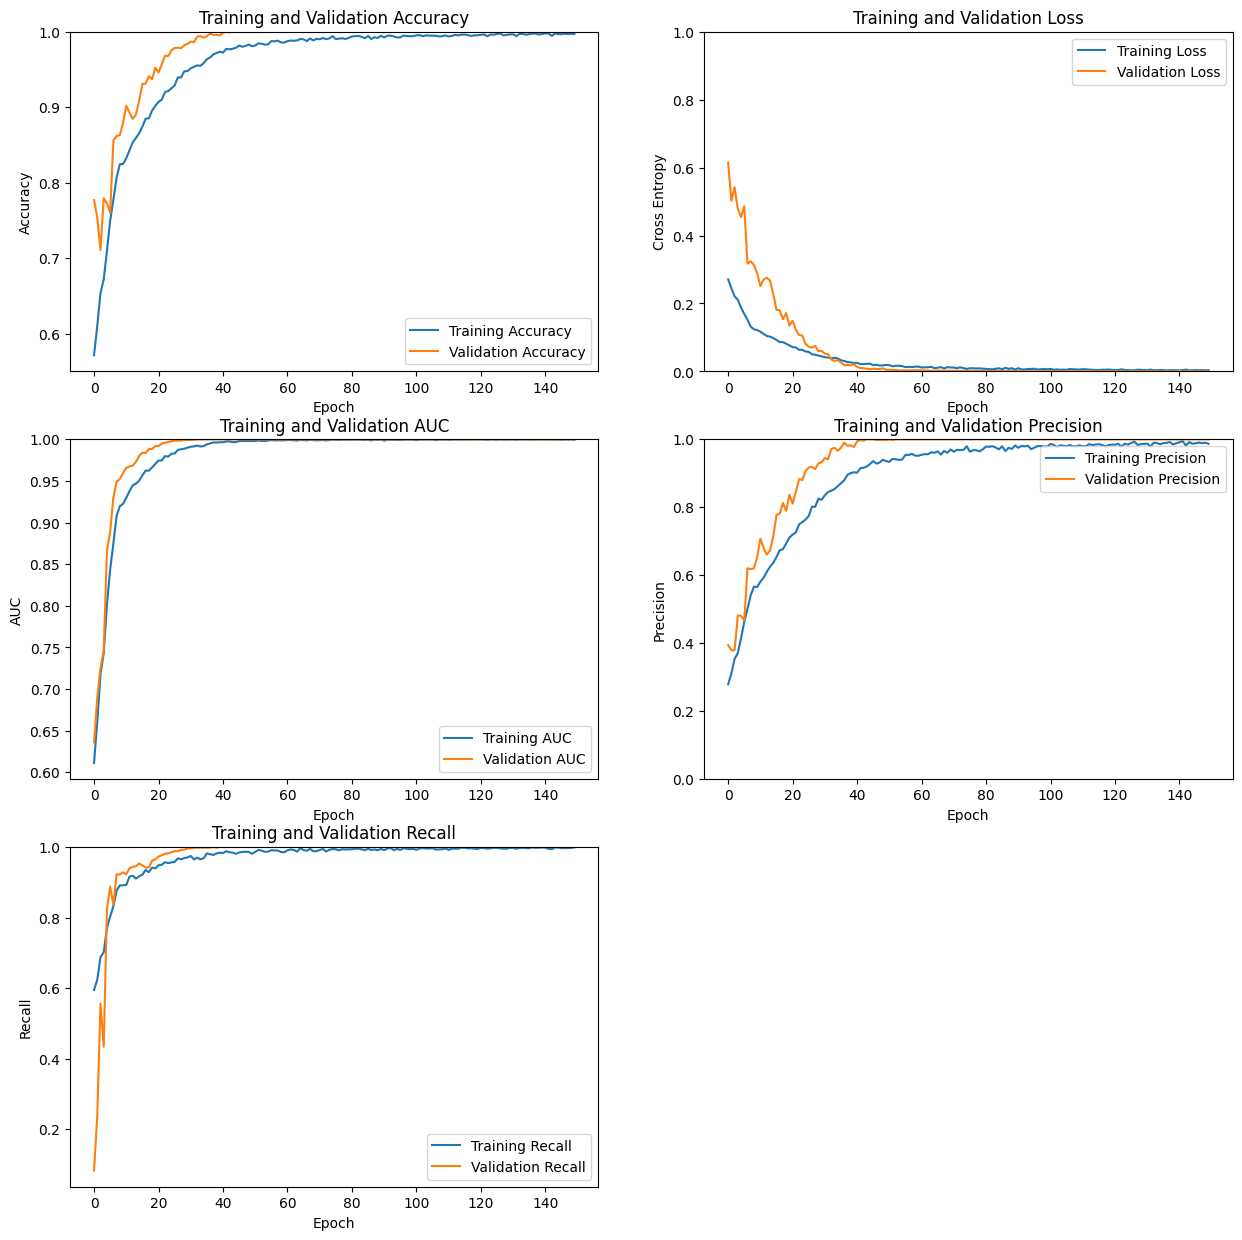

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(15, 15))

#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

#Plotting the AUC:
plt.subplot(3, 2, 3)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')

#Plotting the Precision:
plt.subplot(3, 2, 4)
plt.plot(precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.ylabel('Precision')
plt.ylim([0,1.0])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')

#Plotting the Recall:
plt.subplot(3, 2, 5)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')

#Showing all the graphs:
plt.show()

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

In [ ]:
valid_predictions_baseline = final_new_model.predict(valid_features, batch_size=16)
valid_baseline_results = final_new_model.evaluate(dvalid,batch_size=16, verbose=0)

151/151 [==============================] - 297s 2s/step


In [ ]:
val_precision = round((valid_baseline_results[2]),5)
val_recall = round((valid_baseline_results[3]),5)
val_loss = round((valid_baseline_results[0]),5)
val_accuracy=round((valid_baseline_results[1]),5)
val_auc = round((valid_baseline_results[4]),5)
print('METRIC VALUES FOR VALID DATASET : \n')
print('PRECISION : ', val_precision)
print('RECALL : ', val_recall)
print('ACCURACY : ', val_accuracy)
print('LOSS : ', val_loss)
print('AUC : ', val_auc)

METRIC VALUES FOR VALID DATASET : 

PRECISION :  1.0
RECALL :  1.0
ACCURACY :  1.0
LOSS :  0.00029
AUC :  1.0


In [ ]:
def plot_roc(name, labels, predictions):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  auc = round(metrics.auc(fp, tp),3)

  plt.figure(figsize=(8, 8))
  plt.plot(100*fp, 100*tp, label=name+" = " +str(auc), linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.grid(True)
  plt.title("ROC Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

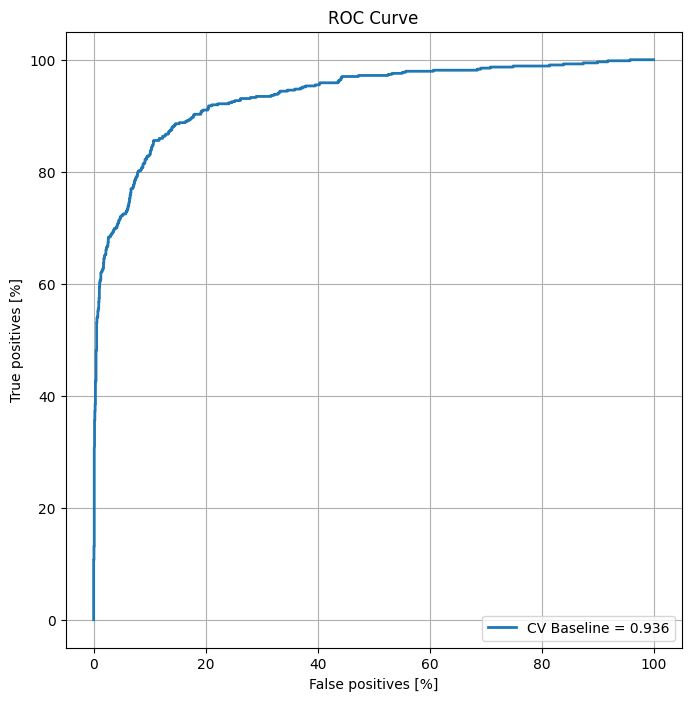

In [ ]:
#Plotting the ROC Curve on CV Dataset:
plot_roc("CV Baseline", validLabels, valid_predictions_baseline)
plt.legend(loc='lower right')

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  tn = cm[0][0]
  fn = cm[1][0]
  fp = cm[0][1]
  tp = cm[1][1]

  sensitivity = round((tp/(tp+fn)),3)
  specificity = round((tn/(tn+fp)),3)
  accuracy = round(((tp + tn)/(tp+tn+fp+fn)),3)
  PPV = round((tp/(tp + fp)),3)
  NPV = round((tn/(tn + fn)),3)
  print('Total Records Detected : ', labels.shape[0])
  print('Total Pneumothorax Cases : ', np.sum(cm[1]))
  print("=====================================")
  print('True Negatives : ', tn)
  print('False Positives : ', fp)
  print('False Negatives : ', fn)
  print('True Positives : ', tp)
  print("=====================================")
  print('Accuracy : ', accuracy)
  print('PPV : ', PPV)
  print('NPV : ', NPV)
  print('Sensitivity : ', sensitivity)
  print('Specificity : ', specificity)
  print("=====================================")

  return tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV

Total Records Detected :  2410
Total Pneumothorax Cases :  534
True Negatives :  1801
False Positives :  75
False Negatives :  161
True Positives :  373
Accuracy :  0.902
PPV :  0.833
NPV :  0.918
Sensitivity :  0.699
Specificity :  0.96


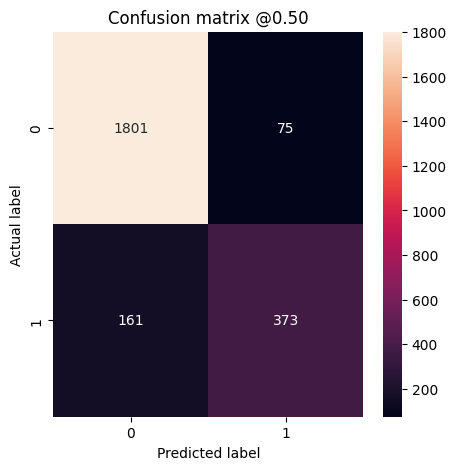

In [ ]:
tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV = plot_cm(validLabels, valid_predictions_baseline)

In [ ]:
final_new_model.load_weights("/content/drive/MyDrive/KhoaLuan/Phân Loại/save_models/Xception.h5")

In [ ]:
def read_image(path):

    x = tf.io.read_file(path)
    x = tf.image.decode_png(x, channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)

    return x

def classify_decode(path):
    file_bytes = tf.io.read_file(path)
    img = tf.image.decode_png(file_bytes, channels=3)
    img = tf.cast(img, tf.float32) / 255.0

    return img

In [ ]:
def Predict(final_classify_model, image_path):
    """
    This function predicts the classfication output and if it is greater than 0.5 it passes the image to the segmentation model.
    ------------------------------------------------------------------
    final_classify_model      : saved classification model instance
    final_segment_model       : saved segmentation model instance
    image_path                : image path
    ------------------------------------------------------------------
    """

     # read the original image
    image_orig = classify_decode(image_path)

    #get the classification output
    classify_output = final_classify_model.predict(tf.expand_dims(image_orig, axis=0))
    confidence = classify_output

    # checking the threshold:
    if confidence > 0.5:
        print('Pneumothorax Found..!!')
        print('Classifier Prediction Confidence : {}%'.format(classify_output*100))
        image_seg1 = read_image(image_path)
        plt.imshow(image_seg1)
    else:
        print('No Pneumothorax Detection...!')
        no_confidence = 1 - classify_output
        print('Classifier Prediction Confidence : {}%'.format(no_confidence*100))
        image_seg1 = read_image(image_path)
        plt.imshow(image_seg1)

In [ ]:
test=final_train_df['ImagePath_Png'].head(11)

1/1 [==============================] - 9s 9s/step
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.98635]]%


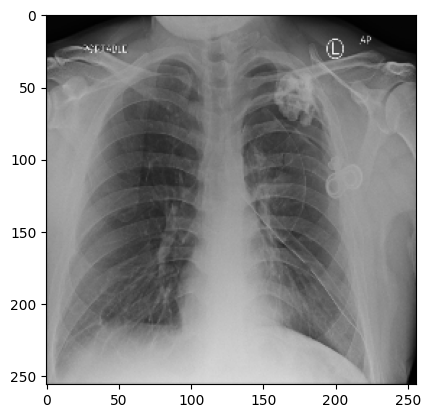

In [ ]:
Predict(final_new_model, 'Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.13666.1517875247.117800.png')

1/1 [==============================] - 0s 26ms/step
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99909]]%


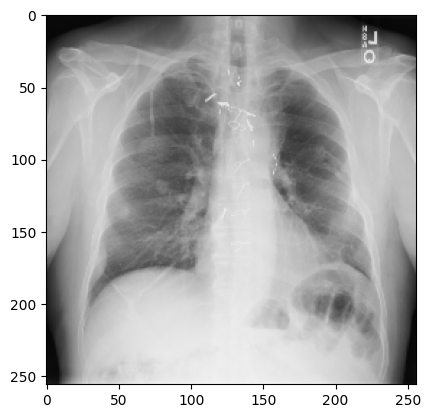

In [ ]:
Predict(final_new_model, 'Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.6904.1517875201.850819.png')

In [ ]:
for image_path in test:
    print(image_path)
    Predict(final_new_model, image_path)

Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.6904.1517875201.850819.png
1/1 [==============================] - 9s 9s/step
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99909]]%
Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.13666.1517875247.117800.png
1/1 [==============================] - 0s 23ms/step
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.98635]]%
Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.11028.1517875229.983789.png
1/1 [==============================] - 0s 23ms/step
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.997574]]%
Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.10366.1517875223.393986.png
1/1 [==============================] - 0s 23ms/step
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.98211]]%
Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.10016.1517875220.992175.png
1/1 [=======